In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score

In [2]:
# Load the datasets
data = pd.read_csv('/home/freitas/ProjetoPraticoIA/DataSet/dataset.csv')
#just_features = pd.read_csv('/home/freitas/ProjetoPraticoIA/DataSet/just_features.csv')

In [3]:
# Prepare the data map the necessary parameters
# Mapping for 'tipo'
tipo_mapping = {'limousine': 0, 'coupe': 1, 'compacto': 2, 'kombi': 3, 'carrinha': 4, 'cabrio': 5, 'suv': 6, 'outro': 7}
data['tipo'] = data['tipo'].map(tipo_mapping)

# Mapping for 'caixa'
caixa_mapping = {'manual': 0, 'automatica': 1}
data['caixa'] = data['caixa'].map(caixa_mapping)

#Mapping for 'com_danos'
com_danos_mapping = {'nao': 0, 'sim': 1}
data['com_danos'] = data['com_danos'].map(com_danos_mapping)

# Mapping for 'combustivel'
combustivel_mapping = {'gasolina': 0, 'diesel': 1, 'outro': 2}
data['combustivel'] = data['combustivel'].map(combustivel_mapping)

# Mapping for 'marca' (assuming 'marca' has too many unique values)
marca_mapping = {marca: i for i, marca in enumerate(data['marca'].unique())}
data['marca'] = data['marca'].map(marca_mapping)

In [4]:
# Display the preprocessed data
data.describe()

,id,tipo,ano_registo,caixa,potencia,km,combustivel,marca,com_danos,preco
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,49878.823840,2.282600,2006.577600,0.251480,137.546760,121195.808000,0.431080,2.931400,0.087800,7876.264120
std,28932.226902,1.830386,4.283129,0.433872,214.565586,41268.626786,0.530341,2.583951,0.283009,11657.351891
min,1.000000,0.000000,2000.000000,0.000000,3.000000,5000.000000,0.000000,0.000000,0.000000,1.000000
25%,24673.750000,0.000000,2003.000000,0.000000,90.000000,90900.000000,0.000000,1.000000,0.000000,2389.000000
50%,49997.500000,2.000000,2006.000000,0.000000,122.000000,150100.000000,0.000000,2.000000,0.000000,5030.000000
75%,75016.500000,3.000000,2010.000000,1.000000,163.000000,150600.000000,1.000000,5.000000,0.000000,10020.000000
max,99998.000000,7.000000,2017.000000,1.000000,16312.000000,151000.000000,2.000000,9.000000,1.000000,745060.000000


In [5]:
y = data['preco']

In [6]:
# The input and output features preparation
X = data.drop(['preco', 'id'], axis = 1)

In [7]:
X.shape

(25000, 8)

In [8]:
print(X[:10])

   tipo  ano_registo  caixa  potencia      km  combustivel  marca  com_danos
0     0         2014      0       140   40800            0      0          0
1     0         2013      0       184   30300            1      1          0
2     1         2009      0       177  150900            1      1          0
3     2         2006      0        54  150500            0      2          0
4     0         2015      0       150   40600            1      2          0
5     0         2002      0       179  150000            0      3          0
6     3         2014      0       110   60300            1      4          0
7     2         2006      0        43  125600            0      0          0
8     3         2011      0       125   70400            0      3          0
9     0         2009      1       116  125800            0      4          0


In [9]:
#Spliting the data into training and testing dataset
from sklearn.model_selection import train_test_split
#Spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 8) (5000, 8) (20000,) (5000,)


In [11]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Instantiation of the model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [13]:
# Fitting the model
price_rf = model.fit(X_train, y_train)

In [14]:
# Training model evaluation

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [16]:
# The training r_sq
print(f'The trained r_sq is: %.2f'%price_rf.score(X_train, y_train))

The trained r_sq is: 0.95


In [17]:
y_train_pred = price_rf.predict(X_train)

In [18]:
# The MAE
print('The MAE is: %.2f'%mean_absolute_error(y_train, y_train_pred))

The MAE is: 701.23


In [19]:
# The MSE
print('The MSE is: %.2f'%mean_squared_error(y_train, y_train_pred))

The MSE is: 5589890.85


In [20]:
# THE RMSE
import numpy as np
print('The RMSE is: %.2f'%np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE is: 2364.30


In [21]:
# The EVS
print('The EVS is: %.2f'%explained_variance_score(y_train, y_train_pred))

The EVS is: 0.95


In [22]:
# Prediction on testing data
y_test_pred = price_rf.predict(X_test)

In [23]:
print(y_test_pred[:100])

[ 2695.94083333  7347.87        9258.44666667  4674.5
  8375.79        1204.2175      5949.2         6135.01
  9563.62         936.36228571 10728.78        2740.85
  8247.59333333  3208.95333333  2723.61        1194.52566667
  3980.49         861.57        2898.79166667  9889.4
  9788.00955556 14899.02        3484.03        4505.80833333
 13046.26        1505.71333333 39745.82       16503.10380952
  9562.82       25573.53       12094.42        9555.19
  6654.02883333 11137.21        1134.91        9933.27666667
  2527.97       10039.7         4927.37666667 12698.73666667
 24885.55666667  3715.05        6812.64833333 11788.3
  2184.16       10951.62       13473.79        3363.025
  3662.95        5502.02        1723.365      30455.2
 12188.02        1794.35333333  1101.60333333  8129.28222222
  7492.32        1905.0215       952.96        5220.1
 11222.59        2863.01        1188.76216667  1353.67
  7893.17       30789.7         2432.05833333  2015.74
  4376.89        9118.28        1

In [24]:
# The testing coef. of determination
print('The testing r_sq is: %.2f'% r2_score(y_test, y_test_pred))

The testing r_sq is: 0.76


In [25]:
# Or
print('The testing r_sq is: %.2f'% price_rf.score(X_test, y_test))

The testing r_sq is: 0.76


In [26]:
# The metrics

In [27]:
#The MAE
print('The MAE IS: %.2f'%mean_absolute_error(y_test, y_test_pred))

The MAE IS: 1877.12


In [28]:
#The MSE
print('The MSE IS: %.2f'%mean_squared_error(y_test, y_test_pred))

The MSE IS: 44309089.68


In [29]:
# THE RMSE
print('The RMSE IS: %.2f'%np.sqrt(mean_squared_error(y_test, y_test_pred)))

The RMSE IS: 6656.51


In [30]:
# The EVS
print('The EVS is: %.2f'% explained_variance_score(y_test, y_test_pred))

The EVS is: 0.76


In [31]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


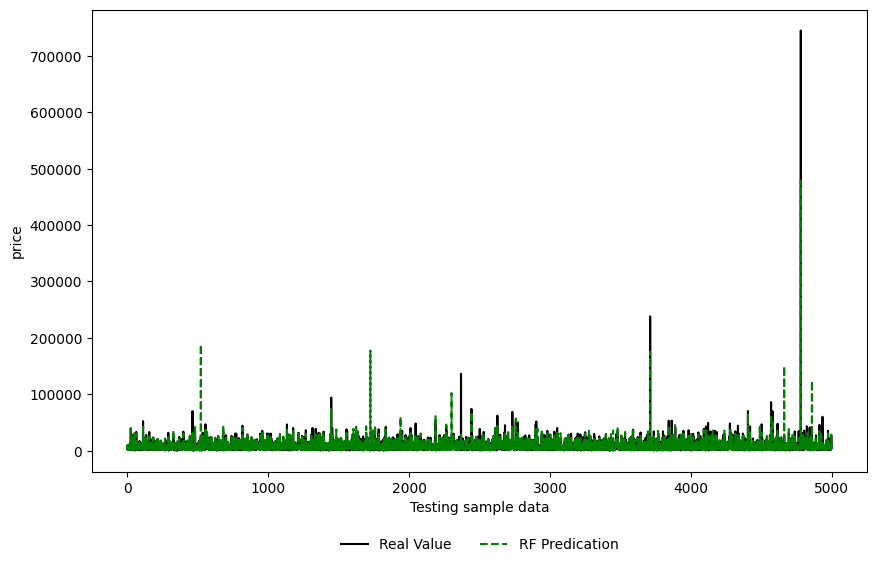

In [32]:
# Plotting the observed and predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(len(X_test))
#Ploting
plt.plot(x_ax, y_test, label = 'Real Value', color = 'k', linestyle = '-')
plt.plot(x_ax, y_test_pred, label = 'RF Predication', color = 'green', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

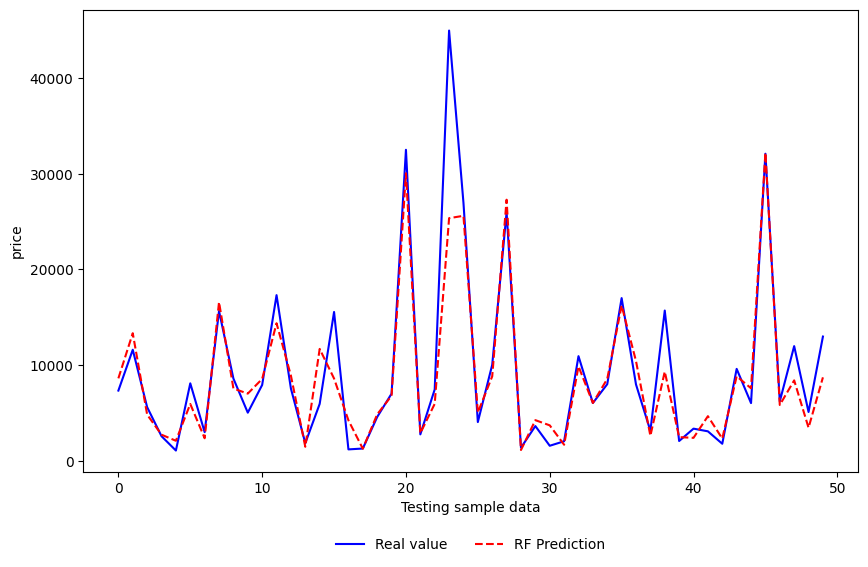

In [33]:
# Plot a more visualized view
import random as rd

# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (10, 6)
x_ax = range(0, 50)
# Setting random search plot

st = rd.randint(0, 4550) #start
nd = st + 50 #end

# Plotting
plt.plot(x_ax, y_test[st:nd], label = 'Real value', color = 'blue', linestyle = '-')
plt.plot(x_ax, y_test_pred[st:nd], label = 'RF Prediction', color = 'red', linestyle = '--')
plt.ylabel('price')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [34]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


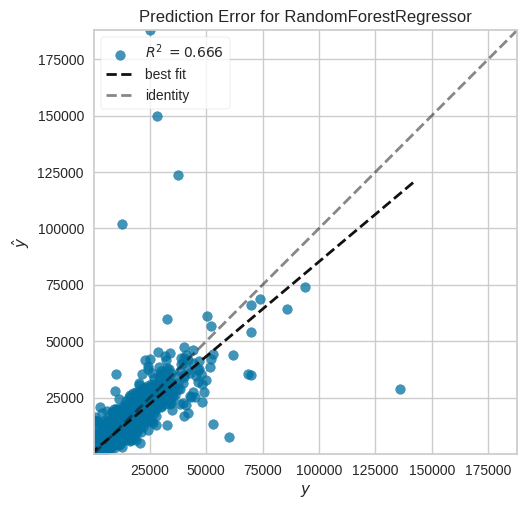

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [35]:
from yellowbrick.regressor import PredictionError

# For plotting clarity concatenated redundant values
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


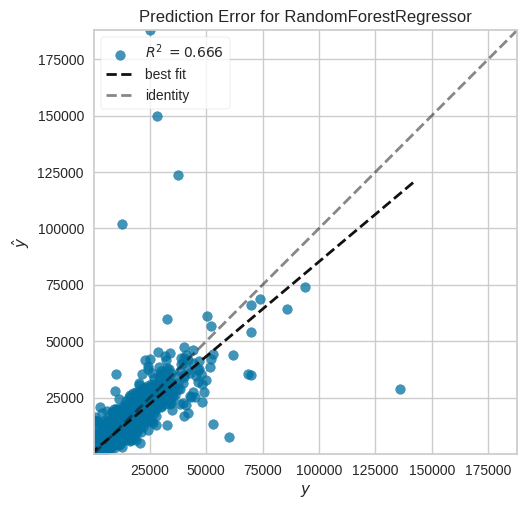

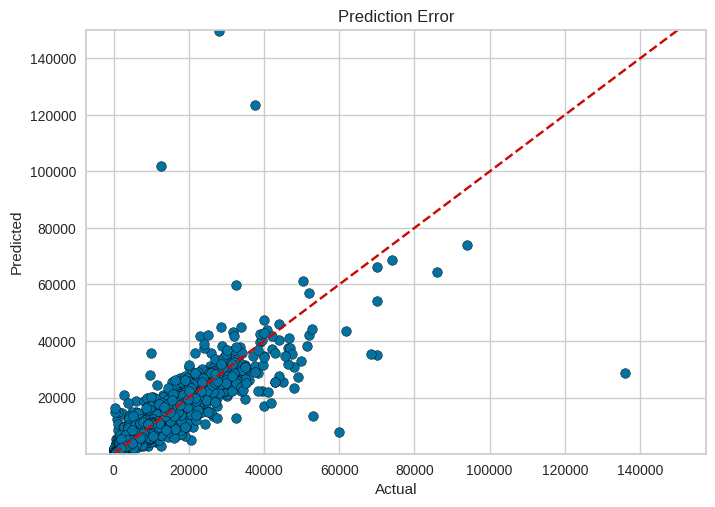

In [36]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt
import numpy as np

# Assuming your desired lower and upper bounds are 100 and 150000, respectively
lower_bound = 100
upper_bound = 150000

# Filter X_test and y_test based on the desired range
indices_within_range = np.where((y_test >= lower_bound) & (y_test <= upper_bound))[0]
X_test_within_range = X_test.iloc[indices_within_range]
y_test_within_range = y_test.iloc[indices_within_range]

# Create PredictionError visualizer with the filtered data
visualizer = PredictionError(price_rf)
visualizer.fit(X_train, y_train)

# Predict on the filtered test data
y_pred_within_range = price_rf.predict(X_test_within_range)

# Filter predicted values within the specified range
indices_y_pred_within_range = np.where((y_pred_within_range >= lower_bound) & (y_pred_within_range <= upper_bound))[0]
y_test_within_range_filtered = y_test_within_range.iloc[indices_y_pred_within_range]
y_pred_within_range_filtered = y_pred_within_range[indices_y_pred_within_range]

# Fit the visualizer on the filtered test data and predicted values within the range
visualizer.score(X_test_within_range, y_test_within_range)
visualizer.poof()

# Set the y-axis limits to display only the specified range for both y and y_hat
plt.ylim(lower_bound, upper_bound)
plt.scatter(y_test_within_range_filtered, y_pred_within_range_filtered, edgecolors=(0, 0, 0))
plt.plot([lower_bound, upper_bound], [lower_bound, upper_bound], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Error')
plt.show()


/home/freitas/PycharmProjects/ProtocolodeClassificacao/venv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


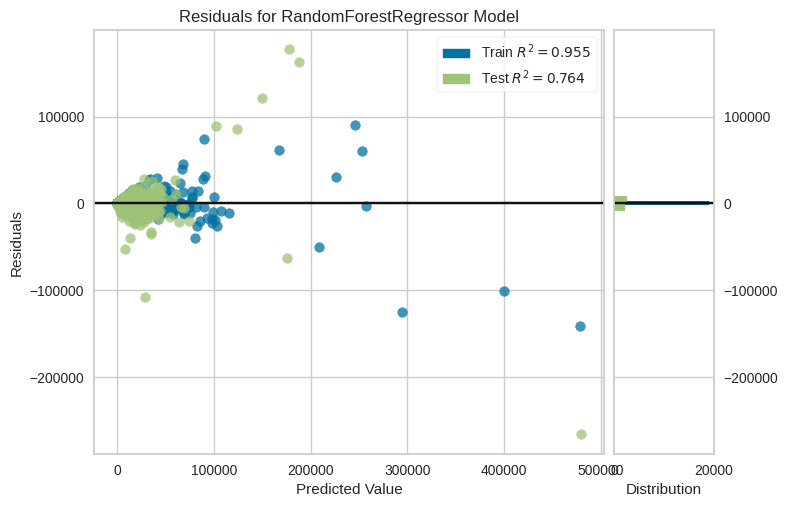

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [37]:
# Plotting Residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(price_rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [38]:
# The k-fold CV
from sklearn.model_selection import cross_val_score

In [39]:
seed = 5 #set to fixed value to check same result

In [40]:
# Training model CV
score_train = cross_val_score(price_rf, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)

In [41]:
score_train

array([-2.15840649e+07, -1.13154973e+07, -1.25085402e+07, -2.36948487e+07,
       -1.12330379e+08, -1.52036000e+07, -6.72708504e+07, -7.93522511e+07,
       -5.28643367e+07, -1.71091214e+07])

In [42]:
# The mean score
print(score_train.mean())

-41323348.96533746


In [43]:
# The absolute mean score
print(abs(score_train.mean()))

41323348.96533746


In [44]:
# The testing model CV
score_test = cross_val_score(price_rf, X_test, y_test, scoring='neg_mean_squared_error', cv = 10)

In [45]:
score_test

array([-9.70119676e+06, -1.68647013e+07, -1.39319899e+07, -2.25037125e+08,
       -1.24476044e+08, -1.31394918e+07, -1.03924691e+07, -1.83826275e+07,
       -2.80587751e+07, -9.41224473e+08])

In [46]:
# The mean score
print(score_train.mean())

-41323348.96533746


In [47]:
# The absolute mean score
print(abs(score_train.mean()))

41323348.96533746


In [48]:
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [49]:
f_list = list(X.columns)
f_importance = pd.Series(price_rf.feature_importances_, index = f_list).sort_values(ascending=False)

In [50]:
print(f_importance)

potencia       0.404434
ano_registo    0.337939
km             0.157228
caixa          0.046399
marca          0.024773
tipo           0.019819
combustivel    0.006095
com_danos      0.003314
dtype: float64


In [51]:

# Data preprocessing
# You may need to perform additional data preprocessing steps based on your dataset

# Split the dataset into features and target variable
X = data.drop('preco', axis=1)  # Features
y = data['preco']  # Target variable

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Fit the model
model.fit(X, y)

# Use the trained model to predict prices for just_features dataset
predicted_prices = model.predict(just_features)

# Create a DataFrame with predicted prices and IDs
predicted_df = pd.DataFrame({'id': just_features['id'], 'preco': predicted_prices})

# Save the predicted prices to a CSV file
predicted_df.to_csv('precos_estimados.csv', index=False)

# Evaluate the model (optional)
# Split the data for evaluation (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


NameError: name 'just_features' is not defined